Grouping and Aggregation of data

In [3]:
import pandas as pd 

In [9]:
emp=pd.read_csv("Sorted_Data.csv")
emp

# Group by

emp.groupby("country")["income"].mean()
emp.groupby("country")["income"].min()
emp.groupby("country")["income"].max()

emp.groupby("gender")["age"].mean()
emp.groupby("gender")["age"].max()

gender
Female     45.0
Male       38.0
Unknown     0.0
Name: age, dtype: float64

In [11]:
#Apply multiple aggregate funs 

emp.groupby("country")["income"].agg(["mean","min","max"])

emp.groupby("country")["income"].agg(avg_salary="mean",min_salary="min",max_salary="max")

,avg_salary,min_salary,max_salary
country,,,
0,68000.0,68000.0,68000.0
Canada,62000.0,62000.0,62000.0
China,51000.0,51000.0,51000.0
India,73000.0,73000.0,73000.0
Mexico,45000.0,45000.0,45000.0
Spain,0.0,0.0,0.0
USA,55500.0,47000.0,62000.0


In [16]:
# apply diff aggretae fun on diff colmns

emp.groupby("country").agg({
    "income":"max",
    "age":"mean"
})

emp.groupby("country").agg(
    max_sal=("income","max"),
    avg_age=("age","mean")
)

,max_sal,avg_age
country,,
0,68000.0,38.00
Canada,62000.0,0.00
China,51000.0,27.00
India,73000.0,45.00
Mexico,45000.0,0.00
Spain,0.0,34.00
USA,62000.0,22.25


Visualisation


<Axes: >

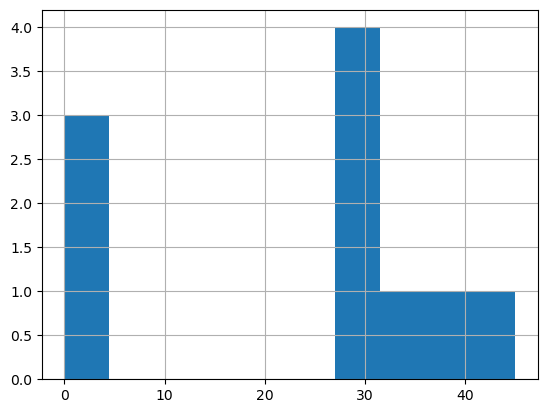

In [19]:
df=pd.read_csv("Sorted_Data.csv")
df["age"].hist()

<Axes: xlabel='age', ylabel='income'>

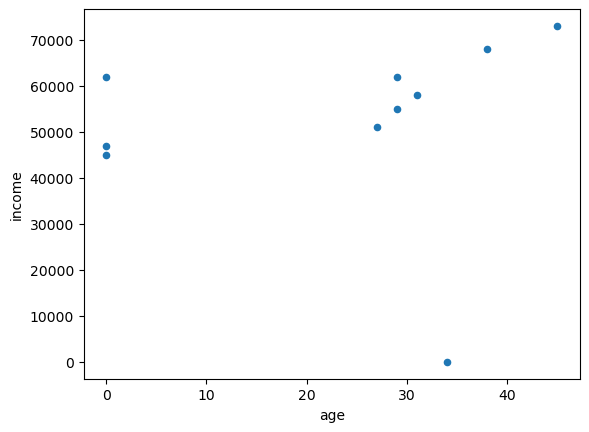

In [21]:
# Age and income relationship

df=df.fillna(50)
df.plot(kind="scatter",x="age",y="income")

Melt- Wide to long format
metl(id_vars-keep,value_vars-unpivot, var_name-new col name,  value_name-new col val)

Pivot- Long to wide format  index, colms, values()

In [29]:
df = pd.DataFrame({
    "country": ["USA", "USA", "India", "India"],
    "year": [2020, 2021, 2020, 2021],
    "sales": [100, 120, 90, 110],
    "profit": [20, 25, 18, 22],
   
})

melteddf=df.melt(
    id_vars=["country", "year"],
    value_vars=["sales", "profit"],
    var_name="metrix",
    value_name="value"
)



In [31]:
# Pivot 

original=melteddf.pivot(
    index=["country","year"],
    columns="metrix",
    values="value"
)
original

metrix        profit  sales
country year               
India   2020      18     90
        2021      22    110
USA     2020      20    100
        2021      25    120